# Business Problem 2

Target visitors who are more likely to convert to a sale

In [4]:
# Import Libraries
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Matplotlib inline creates a plot in the notebook output
import seaborn # Improves the look of graphs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics

%matplotlib inline

In [5]:
# Get reference to Data
df = pd.read_csv('Click_behaviour.csv', encoding = 'latin1')
df.head()

,Ssession_ID,Description,Reviews,Pictures,Recommendations,Best_Sellers,Accessories,Price_Comparison,Click_Similar,Request_more_info,Click_phone_no,Purchase
0,101,1,1,0,1,0,1,1,1,0,1,1
1,102,1,0,0,1,1,1,1,1,1,0,1
2,103,0,1,0,0,0,1,1,1,0,1,1
3,104,0,1,1,1,0,0,0,1,1,1,0
4,105,0,0,0,1,0,1,0,1,1,1,1


In [6]:
df.describe()

,Ssession_ID,Description,Reviews,Pictures,Recommendations,Best_Sellers,Accessories,Price_Comparison,Click_Similar,Request_more_info,Click_phone_no,Purchase
count,500.000000,500.000000,500.0000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,350.500000,0.490000,0.4800,0.554000,0.5200,0.464000,0.498000,0.418000,0.532000,0.468000,0.448000,0.608000
std,144.481833,0.500401,0.5001,0.497573,0.5001,0.499202,0.500497,0.493724,0.499475,0.499475,0.497787,0.488686
min,101.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,350.500000,0.000000,0.0000,1.000000,1.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,475.250000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,600.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Q1. Interations linked with purchases
Which website interactions are highly correlated with a users propensity to purcahse

In [7]:
# Find correleation of an interaction to 'Purchase'
df.corr().Purchase

Ssession_ID          0.045753
Description          0.049498
Reviews              0.386055
Pictures            -0.102328
Recommendations      0.007544
Best_Sellers        -0.008675
Accessories         -0.093340
Price_Comparison     0.173825
Click_Similar       -0.096290
Request_more_info    0.161972
Click_phone_no       0.080799
Purchase             1.000000
Name: Purchase, dtype: float64

## Output reveals that the following are highley correlated with a user's propensity to purchase
Top 3 Results (ranked strongest to weakest)

1. Reviews
2. Price_Comparison
3. Request_more_info

# Q2. Predict likelyhood new customer purchase (based on a test model)

## Select columns with a high correlation

In [6]:
highly_correlated_data = df[ [ 'Reviews', 'Price_Comparison', 'Request_more_info', 'Click_phone_no' ] ]

## Train and Test the Split Data

In [7]:
# Split data in a ratio of 70:30 for training:testing
trainSize = .7
testSize = 1 - trainSize

pred_train, pred_test, tar_train, tar_test = train_test_split(highly_correlated_data, df.Purchase, test_size = testSize)

print("Predictor of Training: ", pred_train.shape, "Predictor of Testing: ", pred_test.shape)

Predictor of Training:  (349, 4) Predictor of Testing:  (151, 4)


## Build Model & Check Accuracy

In [8]:
# Build the prediction model using classification 
classifier = GaussianNB()
classifier = classifier.fit(pred_train, tar_train)
predictions = classifier.predict(pred_test)

# Analyse the accuracy of predictions
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[40, 21],
       [18, 72]])

In [9]:
# Model Accuracy as a percentage 
modelAccuracy = round(sklearn.metrics.accuracy_score(tar_test, predictions) * 100, 2)

print("Model accuracy is", modelAccuracy, "%")

Model accuracy is 74.17 %


In [10]:
# Calculate the probability that the user will purchase.
pred_prob = classifier.predict_proba(pred_test)

# Probability as a percentage
probability = round(pred_prob[0,1] * 100, 2)

print("Probability a new customer will buy is", probability, "%")

Probability a new customer will buy is 43.94 %


# Q3. Real-Time use of the model
Decide whether a user has a propensity to conver for each website column clicked

## Real-Time Predictions

In [145]:
# Class for predictions
class Prediction:
  def __init__(self, propensity, values):
    self.propensity = propensity
    self.values = values

In [157]:
import itertools

# Setup column names and all combinations
columns = ['Reviews', 'Price_Comparison', 'Request_more_info', 'Click_phone_no']
combinations = [1, 2, 3, 4]
outputs = []

# Loop combinations
for L in range(0, len(combinations) + 1):
    for values in itertools.combinations(combinations, L):
        values = list(values)

        # Setup values
        reviewsVal = 1 if 1 in values else 0
        priceComparisonVal = 1 if 2 in values else 0
        requestMoreInfoVal = 1 if 3 in values else 0
        clickPhoneNoVal = 1 if 4 in values else 0

        # Setup Data
        data = np.array([reviewsVal, priceComparisonVal, requestMoreInfoVal, clickPhoneNoVal]).reshape(1,-1)

        # Calculate Propensity
        propensity = round(classifier.predict_proba(data)[:,1][0] * 100, 2)

        # Generate String
        string = ""
        string = string + columns[0] + ', ' if reviewsVal else string
        string = string + columns[1] + ', ' if priceComparisonVal else string
        string = string + columns[2] + ', ' if requestMoreInfoVal else string
        string = string + columns[3] + ', ' if clickPhoneNoVal else string
        
        # Check if all values are 0
        if reviewsVal + priceComparisonVal + requestMoreInfoVal + clickPhoneNoVal == 0:
            string += "where all values are 0"

        # Add to array
        outputs.append(Prediction(propensity, string))

# Sort list by propensity
outputs.sort(key = lambda x: x.propensity, reverse = True)

# Print Output
for prediction in outputs:
    print('Propensity is ' + str(prediction.propensity) + '% for - ' + prediction.values)

Propensity is 92.76% for - Reviews, Price_Comparison, Request_more_info, Click_phone_no, 
Propensity is 90.23% for - Reviews, Price_Comparison, Request_more_info, 
Propensity is 88.79% for - Reviews, Request_more_info, Click_phone_no, 
Propensity is 85.19% for - Reviews, Price_Comparison, Click_phone_no, 
Propensity is 85.1% for - Reviews, Request_more_info, 
Propensity is 80.57% for - Reviews, Price_Comparison, 
Propensity is 78.06% for - Reviews, Click_phone_no, 
Propensity is 71.94% for - Reviews, 
Propensity is 63.58% for - Price_Comparison, Request_more_info, Click_phone_no, 
Propensity is 55.72% for - Price_Comparison, Request_more_info, 
Propensity is 51.91% for - Request_more_info, Click_phone_no, 
Propensity is 43.94% for - Price_Comparison, Click_phone_no, 
Propensity is 43.76% for - Request_more_info, 
Propensity is 36.1% for - Price_Comparison, 
Propensity is 32.65% for - Click_phone_no, 
Propensity is 25.9% for - where all values are 0


# Q4. Plot graph to aid management understand data

In [174]:
cleaned_data = df.drop(["Ssession_ID"], axis = 1)
cleaned_data.head()

,Description,Reviews,Pictures,Recommendations,Best_Sellers,Accessories,Price_Comparison,Click_Similar,Request_more_info,Click_phone_no,Purchase
0,1,1,0,1,0,1,1,1,0,1,1
1,1,0,0,1,1,1,1,1,1,0,1
2,0,1,0,0,0,1,1,1,0,1,1
3,0,1,1,1,0,0,0,1,1,1,0
4,0,0,0,1,0,1,0,1,1,1,1


In [175]:
# Convert data into long format
long_format_data = pd.melt(cleaned_data, id_vars = ['Purchase'], var_name = 'interaction', value_name = 'did_purchase')

long_format_data.head()

,Purchase,interaction,did_purchase
0,1,Description,1
1,1,Description,1
2,1,Description,0
3,0,Description,0
4,1,Description,0


In [209]:
# Filter data to only have record where interaction was associated with a purchase
# Get num of purchases per interaction
num_per_interaction = long_format_data.query('Purchase == 1 and did_purchase == 1') \
                                      .drop(["did_purchase"], axis = 1) \
                                      .groupby(filtered_data['interaction']) \
                                      .sum() \
                                      .sort_values('Purchase', ascending = False) \
                                      .rename(columns = { "Purchase": "Total Purchases" })

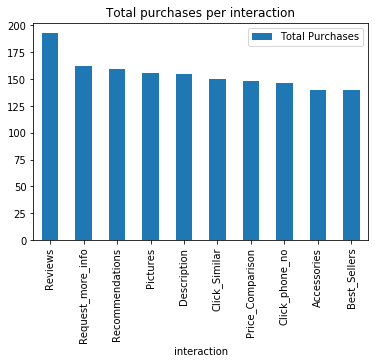

In [210]:
# Plot total purchases for each interaction in descending order
num_per_interaction.plot(kind = 'bar', title = 'Total purchases per interaction')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d4b7c2e10>],
      dtype=object)

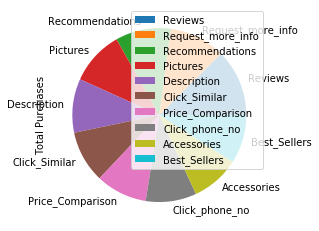

In [203]:
graph_data.plot(kind = 'pie', subplots = True)